In [2]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split, KFold, cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score,roc_curve,auc,precision_recall_curve, accuracy_score, \
recall_score, precision_score, confusion_matrix, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier, BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier,AdaBoostRegressor,AdaBoostClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
import itertools as it
import time as time
import xgboost as xgb
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, acf
from statsmodels.graphics.tsaplots import plot_pacf, pacf
import holidays
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# stationarity analysis

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [33]:
X = east.daily_deaths
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.842138
p-value: 0.002504
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


east = stationary

In [34]:
X = midwest.daily_deaths
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.473716
p-value: 0.122001
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


midwest = NOT stationary

In [35]:
X = south.daily_deaths
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.104854
p-value: 0.026196
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


South = stationary

In [36]:
X = west.daily_deaths
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.816341
p-value: 0.055977
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


west = NOT stationary

## making the midwest and west stationary

In [81]:
midwest = pd.read_csv('final data/midwest_daily.csv')

In [82]:
midwest['stationary_death'] = midwest['daily_deaths'].diff(1)

In [83]:
print(midwest.shape)
print(midwest.tail())

(1136, 3)
            date  daily_deaths  stationary_death
1131  2023-03-19             0               0.0
1132  2023-03-20            23              23.0
1133  2023-03-21           131             108.0
1134  2023-03-22            40             -91.0
1135  2023-03-23           232             192.0


In [84]:
midwest_stationary = midwest[['date', 'stationary_death']]

In [85]:
print(midwest_stationary.shape)
print(midwest_stationary.tail())

(1136, 2)
            date  stationary_death
1131  2023-03-19               0.0
1132  2023-03-20              23.0
1133  2023-03-21             108.0
1134  2023-03-22             -91.0
1135  2023-03-23             192.0


In [86]:
midwest_stationary.reset_index(drop=True, inplace=True)

In [88]:
print(midwest_stationary.isna().sum())
midwest_stationary.head()

date                0
stationary_death    1
dtype: int64


,date,stationary_death
0,2020-02-12,NaN
1,2020-02-13,0.0
2,2020-02-14,0.0
3,2020-02-15,0.0
4,2020-02-16,0.0


In [99]:
midwest_stationary = midwest_stationary.fillna(0)

In [91]:
midwest_stationary.rename(columns={'stationary_death': 'daily_deaths'}, inplace=True)

/var/folders/_r/zhgqwmg93t93tgtk01b4xvtc0000gn/T/ipykernel_38741/2316732593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midwest_stationary.rename(columns={'stationary_death': 'daily_deaths'}, inplace=True)


In [92]:
midwest_stationary.tail()

,date,daily_deaths
1131,2023-03-19,0.0
1132,2023-03-20,23.0
1133,2023-03-21,108.0
1134,2023-03-22,-91.0
1135,2023-03-23,192.0


In [100]:
midwest_stationary.to_csv('midwest_stationary.csv', index = False)

In [101]:
midwest_stationary = pd.read_csv('final data/midwest_stationary.csv')

In [102]:
midwest_stationary.isna().sum()

date            0
daily_deaths    0
dtype: int64

In [103]:
X = midwest_stationary.daily_deaths
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.612100
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


### now the midwest is stationary!

In [105]:
west = pd.read_csv('final data/west_daily.csv')

In [106]:
west['stationary_death'] = west['daily_deaths'].diff(1)

In [108]:
print(west.shape)
print(west.tail())

(1136, 3)
            date  daily_deaths  stationary_death
1131  2023-03-19             0               0.0
1132  2023-03-20            37              37.0
1133  2023-03-21            33              -4.0
1134  2023-03-22           184             151.0
1135  2023-03-23            89             -95.0


In [109]:
west_stationary = west[['date', 'stationary_death']]

In [110]:
print(west.shape)
print(west.tail())

(1136, 3)
            date  daily_deaths  stationary_death
1131  2023-03-19             0               0.0
1132  2023-03-20            37              37.0
1133  2023-03-21            33              -4.0
1134  2023-03-22           184             151.0
1135  2023-03-23            89             -95.0


In [111]:
west_stationary.reset_index(drop=True, inplace=True)

In [112]:
print(west_stationary.isna().sum())
west_stationary.head()

date                0
stationary_death    1
dtype: int64


,date,stationary_death
0,2020-02-12,NaN
1,2020-02-13,0.0
2,2020-02-14,0.0
3,2020-02-15,0.0
4,2020-02-16,0.0


In [113]:
west_stationary = west_stationary.fillna(0)

In [114]:
west_stationary.rename(columns={'stationary_death': 'daily_deaths'}, inplace=True)

In [115]:
west_stationary.tail()

,date,daily_deaths
1131,2023-03-19,0.0
1132,2023-03-20,37.0
1133,2023-03-21,-4.0
1134,2023-03-22,151.0
1135,2023-03-23,-95.0


In [116]:
west_stationary.to_csv('west_stationary.csv', index = False)

In [117]:
west_stationary = pd.read_csv('final data/west_stationary.csv')

In [118]:
X = west_stationary.daily_deaths
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.691688
p-value: 0.000001
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


### now the west is stationary!

### making the south stationary for better predictions as well

In [29]:
south = pd.read_csv('final data/south_daily.csv')
south['stationary_death'] = south['daily_deaths'].diff(1)
print(south.shape)
print(south.tail())

(1136, 3)
            date  daily_deaths  stationary_death
1131  2023-03-19             0               0.0
1132  2023-03-20            71              71.0
1133  2023-03-21            31             -40.0
1134  2023-03-22           240             209.0
1135  2023-03-23            58            -182.0


In [30]:
south_stationary = south[['date', 'stationary_death']]
print(south_stationary.shape)
print(south_stationary.tail())

(1136, 2)
            date  stationary_death
1131  2023-03-19               0.0
1132  2023-03-20              71.0
1133  2023-03-21             -40.0
1134  2023-03-22             209.0
1135  2023-03-23            -182.0


In [31]:
south_stationary.reset_index(drop=True, inplace=True)
print(south_stationary.isna().sum())
south_stationary.head()

date                0
stationary_death    1
dtype: int64


,date,stationary_death
0,2020-02-12,NaN
1,2020-02-13,0.0
2,2020-02-14,0.0
3,2020-02-15,0.0
4,2020-02-16,0.0


In [32]:
south_stationary = south_stationary.fillna(0)
south_stationary.rename(columns={'stationary_death': 'daily_deaths'}, inplace=True)
south_stationary.tail()

,date,daily_deaths
1131,2023-03-19,0.0
1132,2023-03-20,71.0
1133,2023-03-21,-40.0
1134,2023-03-22,209.0
1135,2023-03-23,-182.0


In [33]:
south_stationary.to_csv('south_stationary.csv', index = False)

In [34]:
south_stationary = pd.read_csv('final data/south_stationary.csv')

In [35]:
X = south_stationary.daily_deaths
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.157430
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


# loading the data

In [4]:
### 4 regions
east=pd.read_csv('final data/east_daily.csv', index_col=0, parse_dates=[0])
print(east.shape)
east.tail()

(1136, 1)


,daily_deaths
date,
2023-03-19,0
2023-03-20,7
2023-03-21,14
2023-03-22,266
2023-03-23,80


In [5]:
midwest=pd.read_csv('final data/midwest_stationary.csv', index_col=0, parse_dates=[0])
print(midwest.shape)
midwest.tail()

(1136, 1)


,daily_deaths
date,
2023-03-19,0.0
2023-03-20,23.0
2023-03-21,108.0
2023-03-22,-91.0
2023-03-23,192.0


In [36]:
south=pd.read_csv('final data/south_stationary.csv', index_col=0, parse_dates=[0])
print(south.shape)
south.tail()

(1136, 1)


,daily_deaths
date,
2023-03-19,0.0
2023-03-20,71.0
2023-03-21,-40.0
2023-03-22,209.0
2023-03-23,-182.0


In [7]:
west=pd.read_csv('final data/west_stationary.csv', index_col=0, parse_dates=[0])
print(west.shape)
west.tail()

(1136, 1)


,daily_deaths
date,
2023-03-19,0.0
2023-03-20,37.0
2023-03-21,-4.0
2023-03-22,151.0
2023-03-23,-95.0


# making train data

In [8]:
easttrain = east[east.index < '2021-01-01']
easttest = east[east.index >= '2021-01-01']
print(easttrain.shape, easttest.shape)

(324, 1) (812, 1)


In [9]:
midwesttrain = midwest[midwest.index < '2021-01-01']
midwesttest = midwest[midwest.index >= '2021-01-01']
print(midwesttrain.shape, midwesttest.shape)

(324, 1) (812, 1)


In [39]:
southtrain = south[south.index < '2021-01-01']
southtest = south[south.index >= '2021-01-01']
print(southtrain.shape, southtest.shape)

(324, 1) (812, 1)


In [11]:
westtrain = west[west.index < '2021-01-01']
westtest = west[west.index >= '2021-01-01']
print(westtrain.shape, westtest.shape)

(324, 1) (812, 1)


# arima models (p, d, q)
- because they are stationary, d = 0 so we will be running it as (p, 0, q)

## acf and pacf

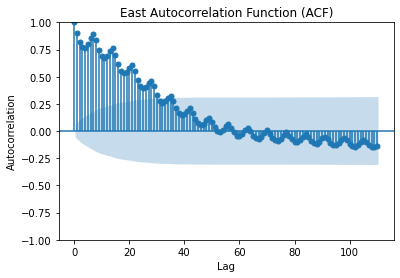

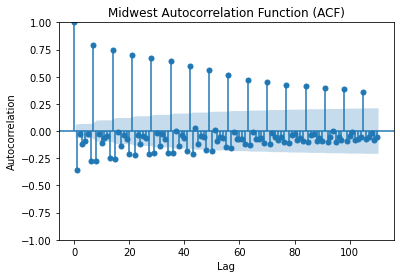

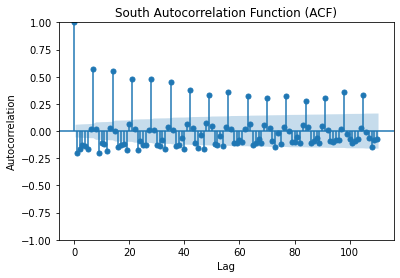

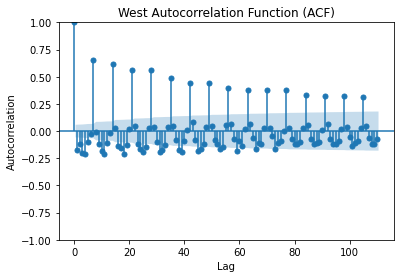

In [37]:
plot_acf(east['daily_deaths'], lags = 110) 
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('East Autocorrelation Function (ACF)')
plt.show()

plot_acf(midwest['daily_deaths'], lags = 110) 
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Midwest Autocorrelation Function (ACF)')
plt.show()

plot_acf(south['daily_deaths'], lags = 110) 
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('South Autocorrelation Function (ACF)')
plt.show()

plot_acf(west['daily_deaths'], lags = 110) 
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('West Autocorrelation Function (ACF)')
plt.show()

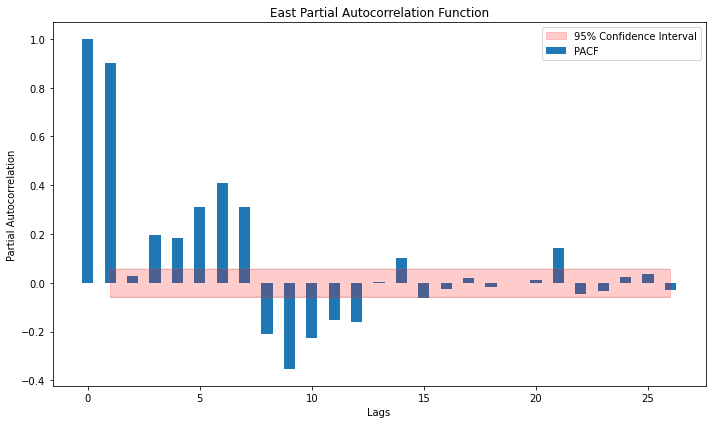

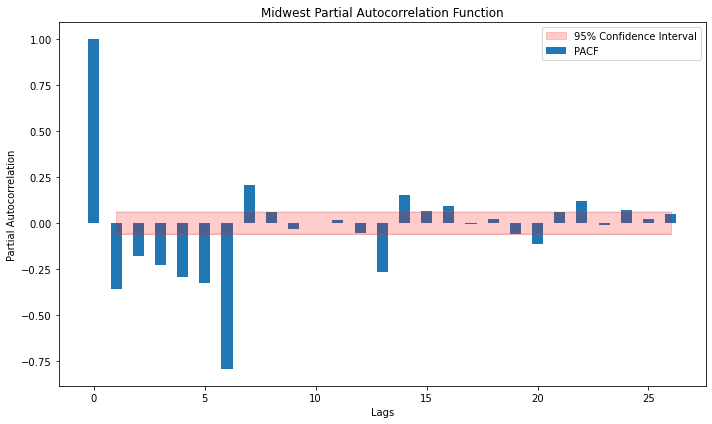

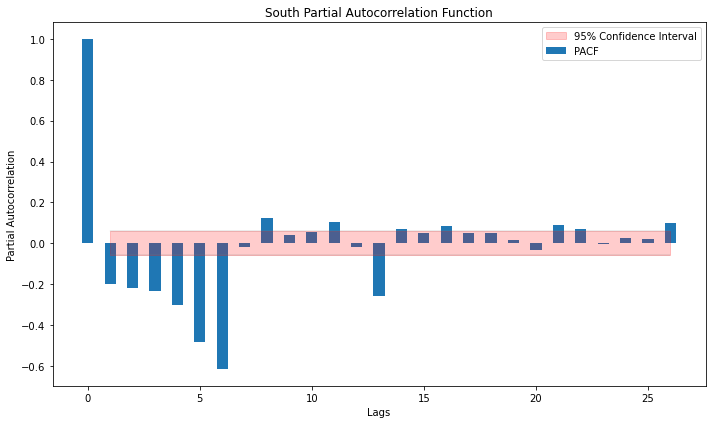

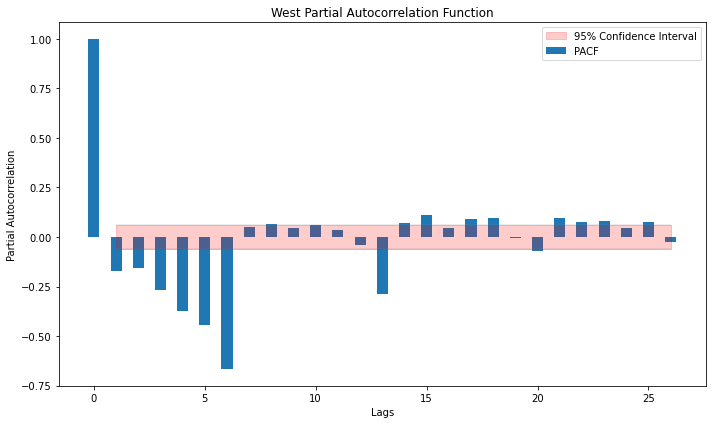

In [38]:
pacf_values, confint = pacf(east['daily_deaths'], alpha=0.05, nlags=26)
lags = np.arange(0, len(pacf_values))
lower_bound = confint[1:, 0] - pacf_values[1:]
upper_bound = confint[1:, 1] - pacf_values[1:]
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(lags, pacf_values, width=0.5, align='center', label='PACF')
ax.fill_between(lags[1:], lower_bound, upper_bound, color='red', alpha=0.2, label='95% Confidence Interval')
ax.plot(lags[1:], upper_bound, color='grey', lw=0.3)
ax.plot(lags[1:], lower_bound, color='grey', lw=0.3)
ax.set_xlabel('Lags')
ax.set_ylabel('Partial Autocorrelation')
ax.set_title('East Partial Autocorrelation Function')
ax.legend()
plt.tight_layout()
plt.show()

pacf_values, confint = pacf(midwest['daily_deaths'], alpha=0.05, nlags=26)
lags = np.arange(0, len(pacf_values))
lower_bound = confint[1:, 0] - pacf_values[1:]
upper_bound = confint[1:, 1] - pacf_values[1:]
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(lags, pacf_values, width=0.5, align='center', label='PACF')
ax.fill_between(lags[1:], lower_bound, upper_bound, color='red', alpha=0.2, label='95% Confidence Interval')
ax.plot(lags[1:], upper_bound, color='grey', lw=0.3)
ax.plot(lags[1:], lower_bound, color='grey', lw=0.3)
ax.set_xlabel('Lags')
ax.set_ylabel('Partial Autocorrelation')
ax.set_title('Midwest Partial Autocorrelation Function')
ax.legend()
plt.tight_layout()
plt.show()

pacf_values, confint = pacf(south['daily_deaths'], alpha=0.05, nlags=26)
lags = np.arange(0, len(pacf_values))
lower_bound = confint[1:, 0] - pacf_values[1:]
upper_bound = confint[1:, 1] - pacf_values[1:]
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(lags, pacf_values, width=0.5, align='center', label='PACF')
ax.fill_between(lags[1:], lower_bound, upper_bound, color='red', alpha=0.2, label='95% Confidence Interval')
ax.plot(lags[1:], upper_bound, color='grey', lw=0.3)
ax.plot(lags[1:], lower_bound, color='grey', lw=0.3)
ax.set_xlabel('Lags')
ax.set_ylabel('Partial Autocorrelation')
ax.set_title('South Partial Autocorrelation Function')
ax.legend()
plt.tight_layout()
plt.show()

pacf_values, confint = pacf(west['daily_deaths'], alpha=0.05, nlags=26)
lags = np.arange(0, len(pacf_values))
lower_bound = confint[1:, 0] - pacf_values[1:]
upper_bound = confint[1:, 1] - pacf_values[1:]
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(lags, pacf_values, width=0.5, align='center', label='PACF')
ax.fill_between(lags[1:], lower_bound, upper_bound, color='red', alpha=0.2, label='95% Confidence Interval')
ax.plot(lags[1:], upper_bound, color='grey', lw=0.3)
ax.plot(lags[1:], lower_bound, color='grey', lw=0.3)
ax.set_xlabel('Lags')
ax.set_ylabel('Partial Autocorrelation')
ax.set_title('West Partial Autocorrelation Function')
ax.legend()
plt.tight_layout()
plt.show()

## east

/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsm

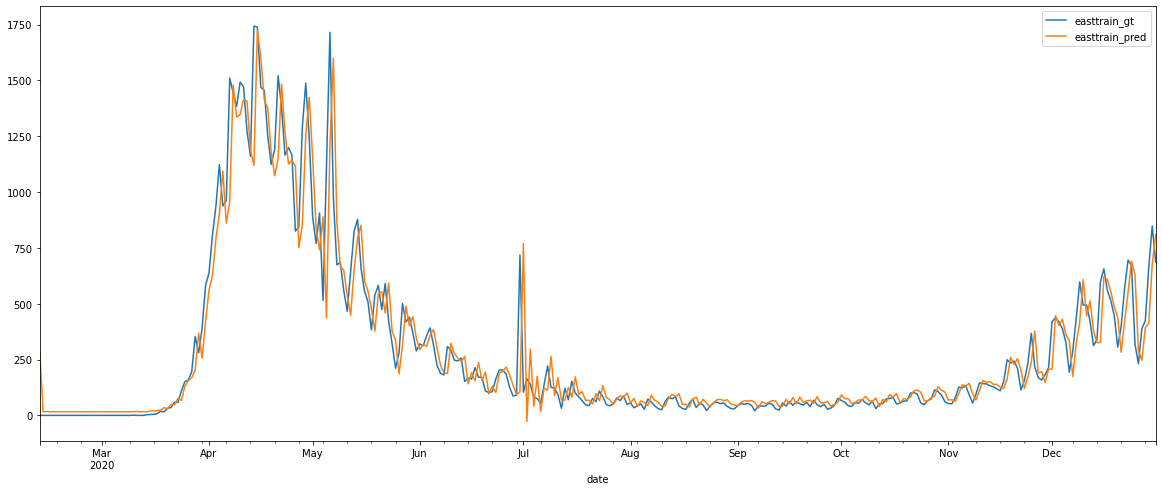

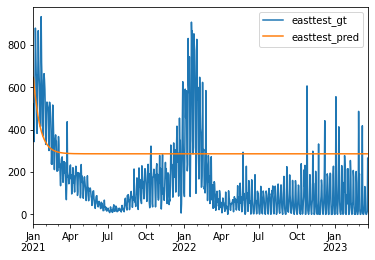

Training Set Metrics:
RMSE: 124.68958728011803
R-squared: 0.8956493403293757
MAE: 67.05817429548782

Testing Set Metrics:
RMSE: 213.35086795558487
R-squared: -0.5566956412207895
MAE: 193.1950943066144


In [136]:
emodel = ARIMA(easttrain, order=(2, 0, 1))
emodel=emodel.fit()

easttrain_pred=emodel.fittedvalues
pd.concat([easttrain, easttrain_pred], axis=1).plot(figsize=(20, 8))
plt.legend(['easttrain_gt', 'easttrain_pred'])
plt.show()

easttest_pred=emodel.predict(start=len(easttrain), end=len(easttrain)+len(easttest)-1, dynamic=True)
pd.concat([easttest, easttest_pred], axis=1).plot()
plt.legend(['easttest_gt', 'easttest_pred'])
plt.show()

# Calculate RMSE, R-squared, and MAE for the training set
rmse_train = np.sqrt(mean_squared_error(easttrain, easttrain_pred))
r2_train = r2_score(easttrain, easttrain_pred)
mae_train = mean_absolute_error(easttrain, easttrain_pred)

print("Training Set Metrics:")
print("RMSE:", rmse_train)
print("R-squared:", r2_train)
print("MAE:", mae_train)

# Calculate RMSE, R-squared, and MAE for the testing set
rmse_test = np.sqrt(mean_squared_error(easttest, easttest_pred))
r2_test = r2_score(easttest, easttest_pred)
mae_test = mean_absolute_error(easttest, easttest_pred)

print("\nTesting Set Metrics:")
print("RMSE:", rmse_test)
print("R-squared:", r2_test)
print("MAE:", mae_test)

/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


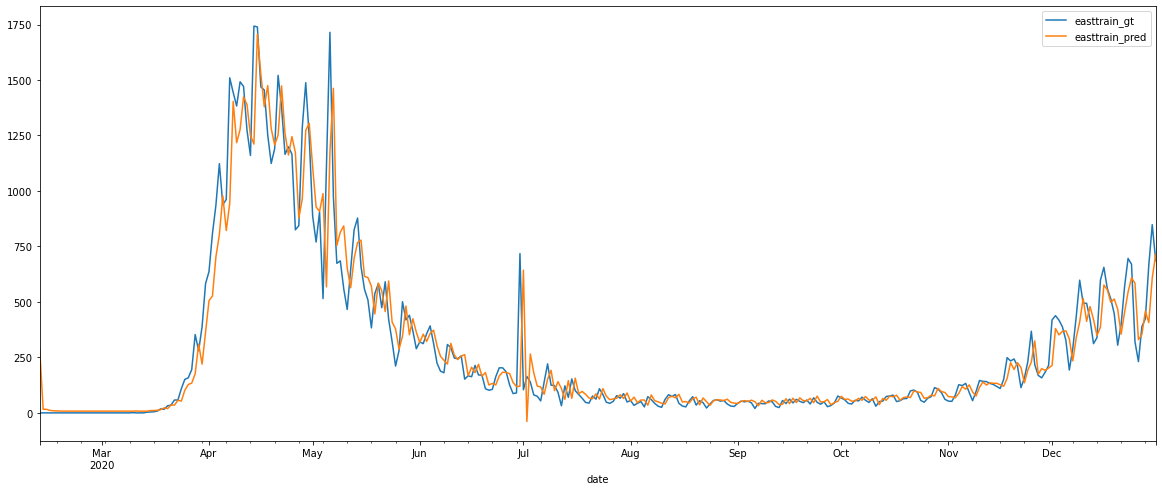

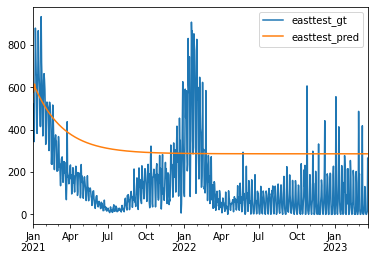

Training Set Metrics:
RMSE: 118.61512941993298
R-squared: 0.9055689110003363
MAE: 63.51994592765201

Testing Set Metrics:
RMSE: 220.98423479937384
R-squared: -0.6700807303573308
MAE: 202.8720020937385


In [25]:
emodel = ARIMA(easttrain, order=(3, 0, 1))
emodel=emodel.fit()

easttrain_pred=emodel.fittedvalues
pd.concat([easttrain, easttrain_pred], axis=1).plot(figsize=(20, 8))
plt.legend(['easttrain_gt', 'easttrain_pred'])
plt.show()

easttest_pred=emodel.predict(start=len(easttrain), end=len(easttrain)+len(easttest)-1, dynamic=True)
pd.concat([easttest, easttest_pred], axis=1).plot()
plt.legend(['easttest_gt', 'easttest_pred'])
plt.show()

# Calculate RMSE, R-squared, and MAE for the training set
rmse_train = np.sqrt(mean_squared_error(easttrain, easttrain_pred))
r2_train = r2_score(easttrain, easttrain_pred)
mae_train = mean_absolute_error(easttrain, easttrain_pred)

print("Training Set Metrics:")
print("RMSE:", rmse_train)
print("R-squared:", r2_train)
print("MAE:", mae_train)

# Calculate RMSE, R-squared, and MAE for the testing set
rmse_test = np.sqrt(mean_squared_error(easttest, easttest_pred))
r2_test = r2_score(easttest, easttest_pred)
mae_test = mean_absolute_error(easttest, easttest_pred)

print("\nTesting Set Metrics:")
print("RMSE:", rmse_test)
print("R-squared:", r2_test)
print("MAE:", mae_test)

## midwest

/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


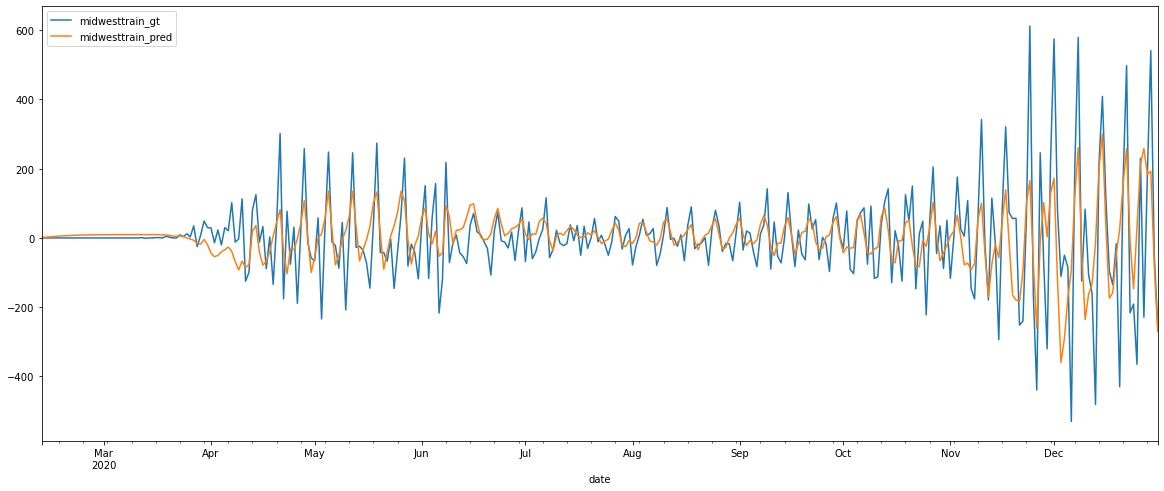

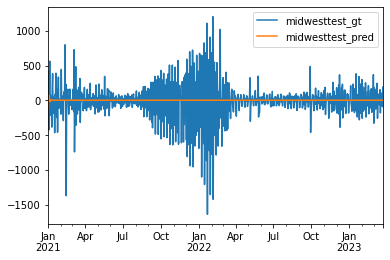

Training Set Metrics:
RMSE: 109.23952406267476
R-squared: 0.32824653761815525
MAE: 68.65662772841692

Testing Set Metrics:
RMSE: 260.76061382099624
R-squared: 0.0002401442254922337
MAE: 155.24460121019558


In [133]:
mmodel = ARIMA(midwesttrain, order=(2, 0, 1))
mmodel=mmodel.fit()

midwesttrain_pred=mmodel.fittedvalues
pd.concat([midwesttrain, midwesttrain_pred], axis=1).plot(figsize=(20, 8))
plt.legend(['midwesttrain_gt', 'midwesttrain_pred'])
plt.show()

midwesttest_pred=mmodel.predict(start=len(midwesttrain), end=len(midwesttrain)+len(midwesttest)-1, dynamic=True)
pd.concat([midwesttest, midwesttest_pred], axis=1).plot()
plt.legend(['midwesttest_gt', 'midwesttest_pred'])
plt.show()

# Calculate RMSE, R-squared, and MAE for the training set
rmse_train = np.sqrt(mean_squared_error(midwesttrain, midwesttrain_pred))
r2_train = r2_score(midwesttrain, midwesttrain_pred)
mae_train = mean_absolute_error(midwesttrain, midwesttrain_pred)

print("Training Set Metrics:")
print("RMSE:", rmse_train)
print("R-squared:", r2_train)
print("MAE:", mae_train)

# Calculate RMSE, R-squared, and MAE for the testing set
rmse_test = np.sqrt(mean_squared_error(midwesttest, midwesttest_pred))
r2_test = r2_score(midwesttest, midwesttest_pred)
mae_test = mean_absolute_error(midwesttest, midwesttest_pred)

print("\nTesting Set Metrics:")
print("RMSE:", rmse_test)
print("R-squared:", r2_test)
print("MAE:", mae_test)

/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


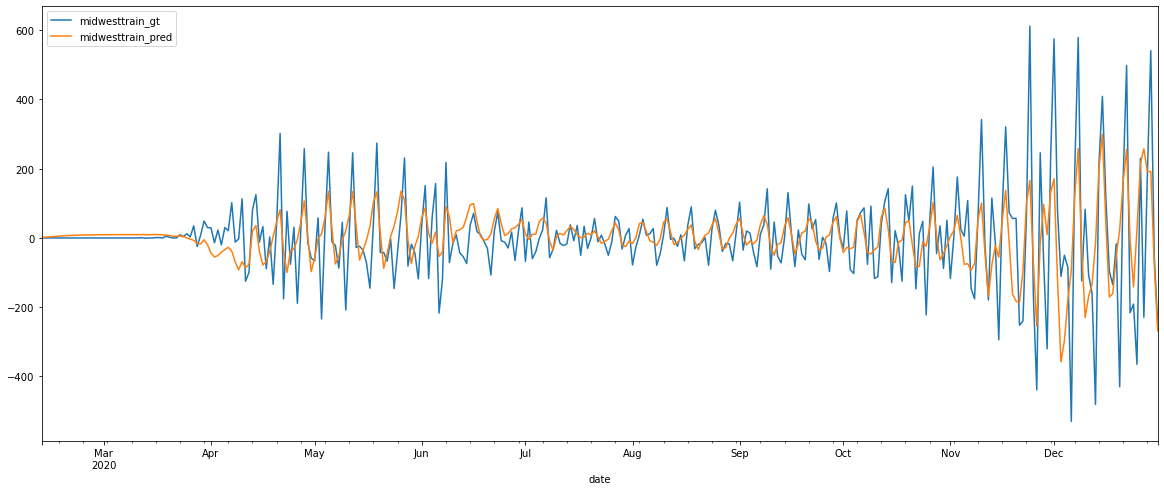

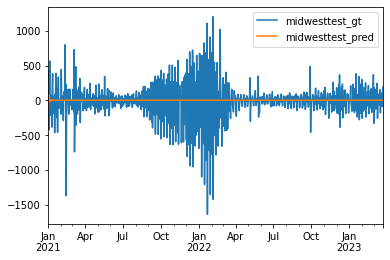

Training Set Metrics:
RMSE: 109.22084568971798
R-squared: 0.3284762381613098
MAE: 68.60549474553893

Testing Set Metrics:
RMSE: 260.769234433121
R-squared: 0.0001740400368990258
MAE: 155.2407561600665


In [26]:
mmodel = ARIMA(midwesttrain, order=(3, 0, 1))
mmodel=mmodel.fit()

midwesttrain_pred=mmodel.fittedvalues
pd.concat([midwesttrain, midwesttrain_pred], axis=1).plot(figsize=(20, 8))
plt.legend(['midwesttrain_gt', 'midwesttrain_pred'])
plt.show()

midwesttest_pred=mmodel.predict(start=len(midwesttrain), end=len(midwesttrain)+len(midwesttest)-1, dynamic=True)
pd.concat([midwesttest, midwesttest_pred], axis=1).plot()
plt.legend(['midwesttest_gt', 'midwesttest_pred'])
plt.show()

# Calculate RMSE, R-squared, and MAE for the training set
rmse_train = np.sqrt(mean_squared_error(midwesttrain, midwesttrain_pred))
r2_train = r2_score(midwesttrain, midwesttrain_pred)
mae_train = mean_absolute_error(midwesttrain, midwesttrain_pred)

print("Training Set Metrics:")
print("RMSE:", rmse_train)
print("R-squared:", r2_train)
print("MAE:", mae_train)

# Calculate RMSE, R-squared, and MAE for the testing set
rmse_test = np.sqrt(mean_squared_error(midwesttest, midwesttest_pred))
r2_test = r2_score(midwesttest, midwesttest_pred)
mae_test = mean_absolute_error(midwesttest, midwesttest_pred)

print("\nTesting Set Metrics:")
print("RMSE:", rmse_test)
print("R-squared:", r2_test)
print("MAE:", mae_test)

## south

/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


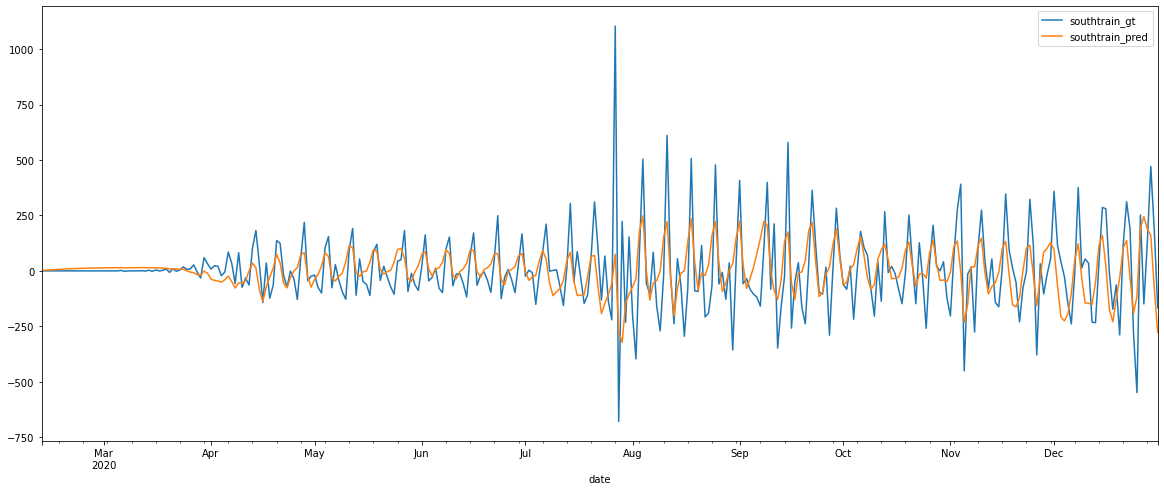

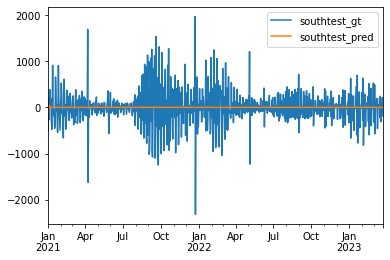

Training Set Metrics:
RMSE: 145.59422559332185
R-squared: 0.28743909187416317
MAE: 98.95465533776901

Testing Set Metrics:
RMSE: 370.35607391166116
R-squared: 0.0012052816789226428
MAE: 240.48684606259522


In [41]:
smodel = ARIMA(southtrain, order=(2, 0, 1))
smodel=smodel.fit()

southtrain_pred=smodel.fittedvalues
pd.concat([southtrain, southtrain_pred], axis=1).plot(figsize=(20, 8))
plt.legend(['southtrain_gt', 'southtrain_pred'])
plt.show()

southtest_pred=smodel.predict(start=len(southtrain), end=len(southtrain)+len(southtest)-1, dynamic=True)
pd.concat([southtest, southtest_pred], axis=1).plot()
plt.legend(['southtest_gt', 'southtest_pred'])
plt.show()

# Calculate RMSE, R-squared, and MAE for the training set
rmse_train = np.sqrt(mean_squared_error(southtrain, southtrain_pred))
r2_train = r2_score(southtrain, southtrain_pred)
mae_train = mean_absolute_error(southtrain, southtrain_pred)

print("Training Set Metrics:")
print("RMSE:", rmse_train)
print("R-squared:", r2_train)
print("MAE:", mae_train)

# Calculate RMSE, R-squared, and MAE for the testing set
rmse_test = np.sqrt(mean_squared_error(southtest, southtest_pred))
r2_test = r2_score(southtest, southtest_pred)
mae_test = mean_absolute_error(southtest, southtest_pred)

print("\nTesting Set Metrics:")
print("RMSE:", rmse_test)
print("R-squared:", r2_test)
print("MAE:", mae_test)

/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


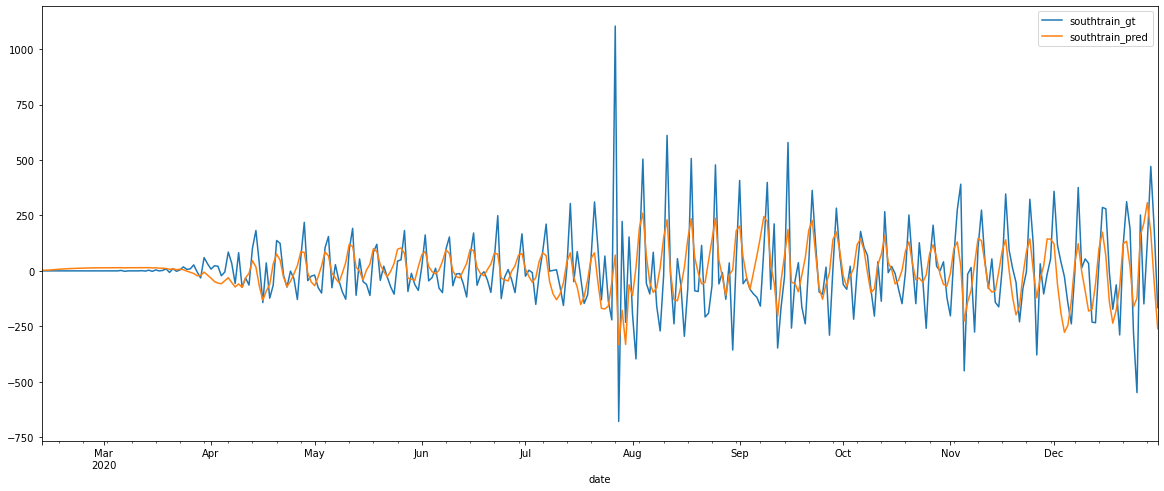

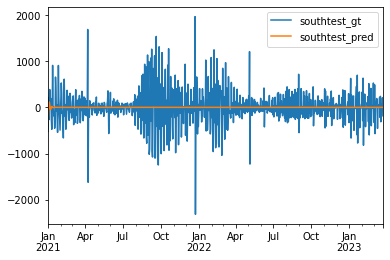

Training Set Metrics:
RMSE: 142.33302648925672
R-squared: 0.31900321857589875
MAE: 97.62599562504751

Testing Set Metrics:
RMSE: 370.3713135779705
R-squared: 0.0011230818044815072
MAE: 240.49696422707174


In [42]:
smodel = ARIMA(southtrain, order=(3, 0, 1))
smodel=smodel.fit()

southtrain_pred=smodel.fittedvalues
pd.concat([southtrain, southtrain_pred], axis=1).plot(figsize=(20, 8))
plt.legend(['southtrain_gt', 'southtrain_pred'])
plt.show()

southtest_pred=smodel.predict(start=len(southtrain), end=len(southtrain)+len(southtest)-1, dynamic=True)
pd.concat([southtest, southtest_pred], axis=1).plot()
plt.legend(['southtest_gt', 'southtest_pred'])
plt.show()

# Calculate RMSE, R-squared, and MAE for the training set
rmse_train = np.sqrt(mean_squared_error(southtrain, southtrain_pred))
r2_train = r2_score(southtrain, southtrain_pred)
mae_train = mean_absolute_error(southtrain, southtrain_pred)

print("Training Set Metrics:")
print("RMSE:", rmse_train)
print("R-squared:", r2_train)
print("MAE:", mae_train)

# Calculate RMSE, R-squared, and MAE for the testing set
rmse_test = np.sqrt(mean_squared_error(southtest, southtest_pred))
r2_test = r2_score(southtest, southtest_pred)
mae_test = mean_absolute_error(southtest, southtest_pred)

print("\nTesting Set Metrics:")
print("RMSE:", rmse_test)
print("R-squared:", r2_test)
print("MAE:", mae_test)

## west

/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


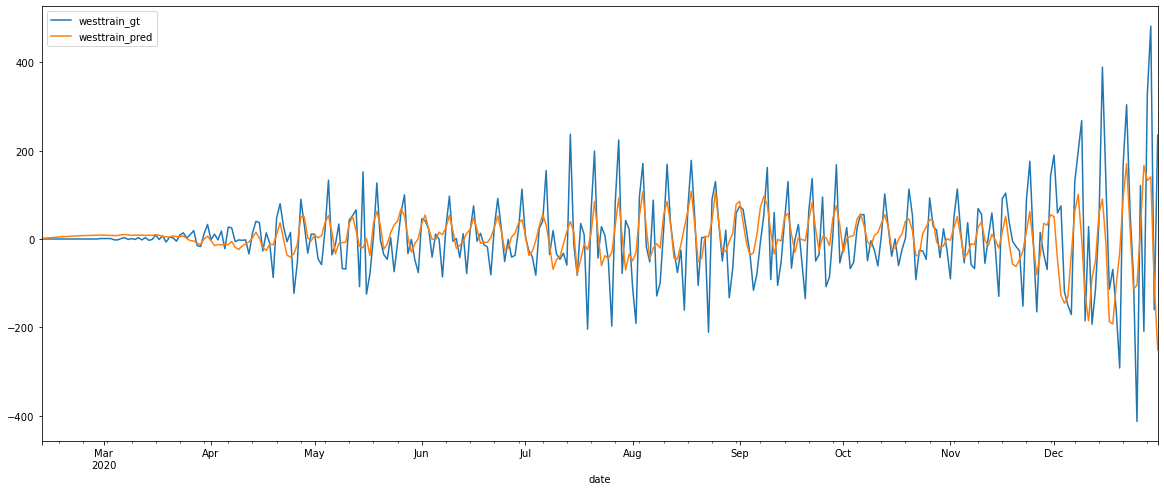

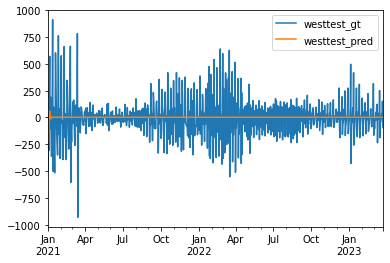

Training Set Metrics:
RMSE: 79.5236069946699
R-squared: 0.27387405610824733
MAE: 51.2026544729254

Testing Set Metrics:
RMSE: 172.4060003772938
R-squared: 0.009640467138600894
MAE: 114.23375769736374


In [134]:
wmodel = ARIMA(westtrain, order=(2, 0, 1))
wmodel=wmodel.fit()

westtrain_pred=wmodel.fittedvalues
pd.concat([westtrain, westtrain_pred], axis=1).plot(figsize=(20, 8))
plt.legend(['westtrain_gt', 'westtrain_pred'])
plt.show()

westtest_pred=wmodel.predict(start=len(westtrain), end=len(westtrain)+len(westtest)-1, dynamic=True)
pd.concat([westtest, westtest_pred], axis=1).plot()
plt.legend(['westtest_gt', 'westtest_pred'])
plt.show()

# Calculate RMSE, R-squared, and MAE for the training set
rmse_train = np.sqrt(mean_squared_error(westtrain, westtrain_pred))
r2_train = r2_score(westtrain, westtrain_pred)
mae_train = mean_absolute_error(westtrain, westtrain_pred)

print("Training Set Metrics:")
print("RMSE:", rmse_train)
print("R-squared:", r2_train)
print("MAE:", mae_train)

# Calculate RMSE, R-squared, and MAE for the testing set
rmse_test = np.sqrt(mean_squared_error(westtest, westtest_pred))
r2_test = r2_score(westtest, westtest_pred)
mae_test = mean_absolute_error(westtest, westtest_pred)

print("\nTesting Set Metrics:")
print("RMSE:", rmse_test)
print("R-squared:", r2_test)
print("MAE:", mae_test)

/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


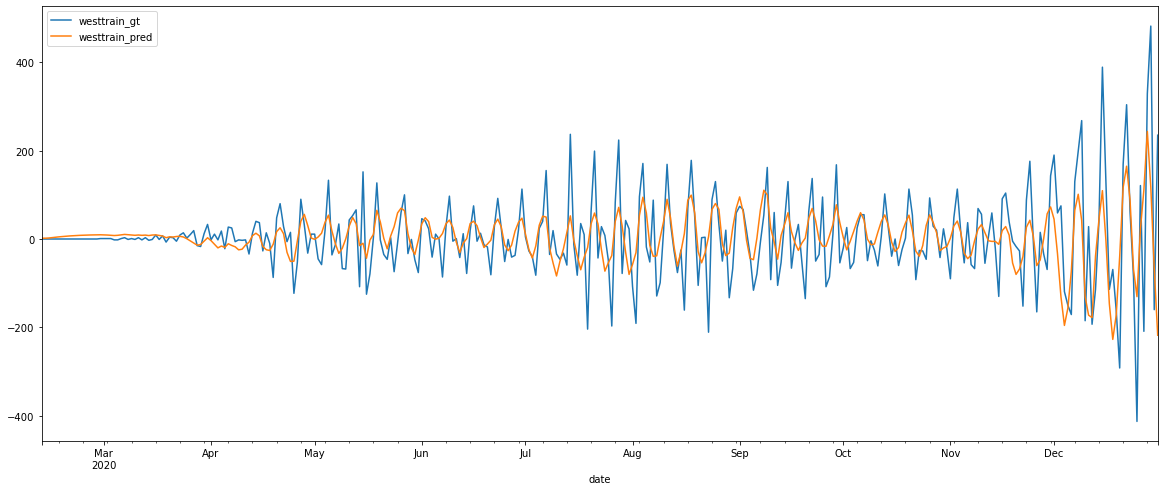

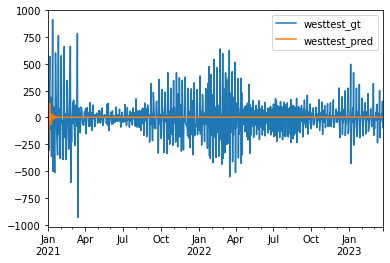

Training Set Metrics:
RMSE: 77.0934504300249
R-squared: 0.31757523246769304
MAE: 50.63416055580227

Testing Set Metrics:
RMSE: 171.59070982797095
R-squared: 0.01898494049298194
MAE: 113.884955289945


In [28]:
wmodel = ARIMA(westtrain, order=(3, 0, 1))
wmodel=wmodel.fit()

westtrain_pred=wmodel.fittedvalues
pd.concat([westtrain, westtrain_pred], axis=1).plot(figsize=(20, 8))
plt.legend(['westtrain_gt', 'westtrain_pred'])
plt.show()

westtest_pred=wmodel.predict(start=len(westtrain), end=len(westtrain)+len(westtest)-1, dynamic=True)
pd.concat([westtest, westtest_pred], axis=1).plot()
plt.legend(['westtest_gt', 'westtest_pred'])
plt.show()

# Calculate RMSE, R-squared, and MAE for the training set
rmse_train = np.sqrt(mean_squared_error(westtrain, westtrain_pred))
r2_train = r2_score(westtrain, westtrain_pred)
mae_train = mean_absolute_error(westtrain, westtrain_pred)

print("Training Set Metrics:")
print("RMSE:", rmse_train)
print("R-squared:", r2_train)
print("MAE:", mae_train)

# Calculate RMSE, R-squared, and MAE for the testing set
rmse_test = np.sqrt(mean_squared_error(westtest, westtest_pred))
r2_test = r2_score(westtest, westtest_pred)
mae_test = mean_absolute_error(westtest, westtest_pred)

print("\nTesting Set Metrics:")
print("RMSE:", rmse_test)
print("R-squared:", r2_test)
print("MAE:", mae_test)

Combined RMSE: 828.9416864006017
Combined R-squared: -0.27410754245619473
Combined MAE: 556.6922713259338


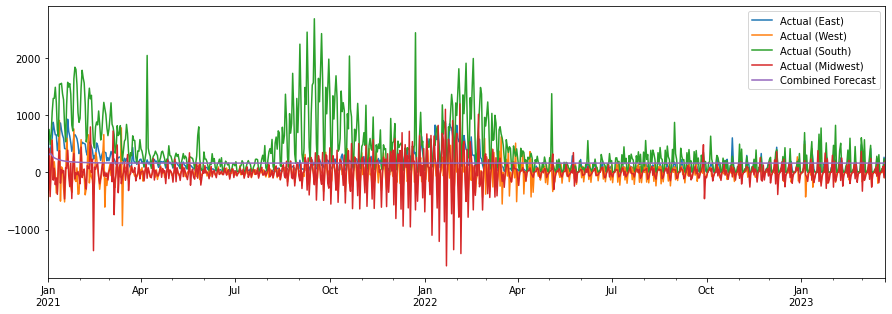

In [137]:
combined_forecast = (easttest_pred + westtest_pred + southtest_pred + midwesttest_pred) / 4

# Evaluate and fine-tune as needed
actual_values_combined = easttest['daily_deaths'].values + westtest['daily_deaths'].values + southtest['daily_deaths'].values + midwesttest['daily_deaths'].values

predicted_values_combined = combined_forecast.values

# Calculate RMSE
rmse_combined = np.sqrt(mean_squared_error(actual_values_combined, predicted_values_combined))

# Calculate R-squared
r_squared_combined = r2_score(actual_values_combined, predicted_values_combined)

# Calculate MAE
mae_combined = mean_absolute_error(actual_values_combined, predicted_values_combined)

# Print or use the metrics as needed
print(f"Combined RMSE: {rmse_combined}")
print(f"Combined R-squared: {r_squared_combined}")
print(f"Combined MAE: {mae_combined}")

# Combine actual values for plotting
actual_values_combined = pd.concat([easttest['daily_deaths'], westtest['daily_deaths'], southtest['daily_deaths'], midwesttest['daily_deaths']], axis=1)
actual_values_combined.columns = ['East', 'West', 'South', 'Midwest']

# Plot the actual values and combined forecast
pd.concat([actual_values_combined, combined_forecast], axis=1).plot(figsize=(15, 5))
plt.legend(['Actual (East)', 'Actual (West)', 'Actual (South)', 'Actual (Midwest)', 'Combined Forecast'])
plt.show()


Combined RMSE: 650.6288978736097
Combined R-squared: -0.002781893371765154
Combined MAE: 435.83564304788126


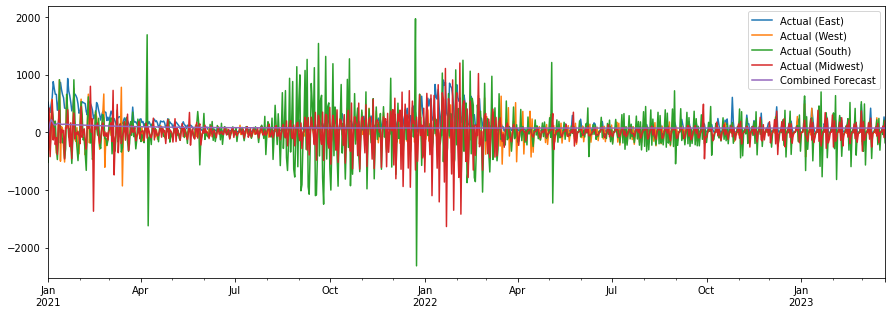

In [43]:
combined_forecast = (easttest_pred + westtest_pred + southtest_pred + midwesttest_pred) / 4

# Evaluate and fine-tune as needed
actual_values_combined = easttest['daily_deaths'].values + westtest['daily_deaths'].values + southtest['daily_deaths'].values + midwesttest['daily_deaths'].values

predicted_values_combined = combined_forecast.values

# Calculate RMSE
rmse_combined = np.sqrt(mean_squared_error(actual_values_combined, predicted_values_combined))

# Calculate R-squared
r_squared_combined = r2_score(actual_values_combined, predicted_values_combined)

# Calculate MAE
mae_combined = mean_absolute_error(actual_values_combined, predicted_values_combined)

# Print or use the metrics as needed
print(f"Combined RMSE: {rmse_combined}")
print(f"Combined R-squared: {r_squared_combined}")
print(f"Combined MAE: {mae_combined}")

# Combine actual values for plotting
actual_values_combined = pd.concat([easttest['daily_deaths'], westtest['daily_deaths'], southtest['daily_deaths'], midwesttest['daily_deaths']], axis=1)
actual_values_combined.columns = ['East', 'West', 'South', 'Midwest']

# Plot the actual values and combined forecast
pd.concat([actual_values_combined, combined_forecast], axis=1).plot(figsize=(15, 5))
plt.legend(['Actual (East)', 'Actual (West)', 'Actual (South)', 'Actual (Midwest)', 'Combined Forecast'])
plt.show()
